# NLP ASSIGNMENT

This is a group assignment. You can complete this assignment in groups of max 4 students Please provide an efficient and sophisticated way to figure out what words are trending. Use the provided input which is a large collection of news texts with timestamps. Your method and interpretation of trending is up to you but please state your rationale and assumptions. The submission will be considered with regards to 
* method, 
* analysis,
* programming,
* communication skills,
* quality of results, 
* and discussion of results

## BARAH (C0860531), CATHARIN JOSE (C0860087), DANNY JOSE (C0864600),SRI BINDU CHINTAKAYALA (C0857498), Gurveer Kaur (C0830495)

# Data Collection

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Assignment 1 data',encoding='utf-8',dtype=str, error_bad_lines=False)

C:\Users\danny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print("Size/Shape of the dataset: ",data.shape)


Size/Shape of the dataset:  (421993, 19)


In [4]:
print("Checking for null values:\n",data.isnull().sum())


Checking for null values:
 DATE                           0
TIME                           0
UNIQUE_STORY_INDEX             0
EVENT_TYPE                     0
PNAC                           0
STORY_DATE_TIME                0
TAKE_DATE_TIME            171377
HEADLINE_ALERT_TEXT        43153
ACCUMULATED_STORY_TEXT    404294
TAKE_TEXT                 250621
PRODUCTS                   42738
TOPICS                     42738
RELATED_RICS              270367
NAMED_ITEMS               319965
HEADLINE_SUBTYPE          266397
STORY_TYPE                 42738
TABULAR_FLAG               42738
ATTRIBUTION                42738
LANGUAGE                   42738
dtype: int64


In [5]:
print("Checking Data-type of each column:\n",data.dtypes)

Checking Data-type of each column:
 DATE                      object
TIME                      object
UNIQUE_STORY_INDEX        object
EVENT_TYPE                object
PNAC                      object
STORY_DATE_TIME           object
TAKE_DATE_TIME            object
HEADLINE_ALERT_TEXT       object
ACCUMULATED_STORY_TEXT    object
TAKE_TEXT                 object
PRODUCTS                  object
TOPICS                    object
RELATED_RICS              object
NAMED_ITEMS               object
HEADLINE_SUBTYPE          object
STORY_TYPE                object
TABULAR_FLAG              object
ATTRIBUTION               object
LANGUAGE                  object
dtype: object


In [6]:
data.head()

,DATE,TIME,UNIQUE_STORY_INDEX,EVENT_TYPE,PNAC,STORY_DATE_TIME,TAKE_DATE_TIME,HEADLINE_ALERT_TEXT,ACCUMULATED_STORY_TEXT,TAKE_TEXT,PRODUCTS,TOPICS,RELATED_RICS,NAMED_ITEMS,HEADLINE_SUBTYPE,STORY_TYPE,TABULAR_FLAG,ATTRIBUTION,LANGUAGE
0,2013-06-01,00:00:00.704,20130601000000nASA05F0W,ALERT,nASA05F0W,2013-06-01 00:00:00,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...,NaN,NaN,E U CAN,MNGISS BACT MET BMAT MIN MINE MTAL CMPNY CA AM...,ML.TO,NaN,NaN,S,FALSE,RTRS,EN
1,2013-06-01,00:00:00.885,20130601000001nS6N0A8042,ALERT,nS6N0A8042,2013-06-01 00:00:01,2013-06-01 00:00:01,S.KOREA SAYS MAY TRADE BALANCE AT PROVISIONAL ...,NaN,NaN,M D T E C MTL GRO SOF O,EMRG KR MCE ECI NEWS TRD ASIA TRACC LEN RTRS,KRIMGR=ECI KRTBAL=ECI 0#KRCOMP1=KQ KREXGR=ECI ...,NaN,NaN,S,FALSE,RTRS,EN
2,2013-06-01,00:00:01.052,20130501000000nEAP51Z100,DELETE,nEAP51Z100,2013-05-01 00:00:00,2013-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-06-01,00:00:01.052,20130601000000nEAP51Z100,HEADLINE,nEAP51Z100,2013-06-01 00:00:00,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,NaN,TEST,AGA LEN RTRS,NaN,NaN,2,S,FALSE,RTRS,EN
4,2013-06-01,00:00:01.055,20130601000000nEAP51Z100,STORY_TAKE_OVERWRITE,nEAP51Z100,2013-06-01 00:00:00,NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",NaN,"Test, Please Ignore -- EMEA -- 06/01 00:00",TEST,AGA LEN RTRS,NaN,NaN,NaN,S,FALSE,RTRS,EN


In [7]:
#Checking percentage of nan value
data.isna().mean()*100

DATE                       0.000000
TIME                       0.000000
UNIQUE_STORY_INDEX         0.000000
EVENT_TYPE                 0.000000
PNAC                       0.000000
STORY_DATE_TIME            0.000000
TAKE_DATE_TIME            40.611337
HEADLINE_ALERT_TEXT       10.225999
ACCUMULATED_STORY_TEXT    95.805855
TAKE_TEXT                 59.389848
PRODUCTS                  10.127656
TOPICS                    10.127656
RELATED_RICS              64.069072
NAMED_ITEMS               75.822348
HEADLINE_SUBTYPE          63.128298
STORY_TYPE                10.127656
TABULAR_FLAG              10.127656
ATTRIBUTION               10.127656
LANGUAGE                  10.127656
dtype: float64

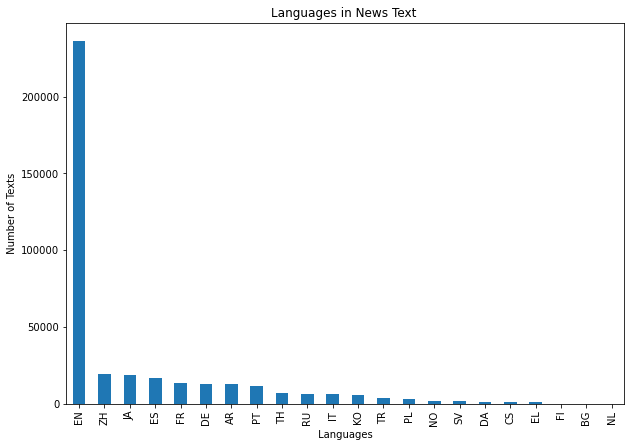

In [8]:
plt.figure(figsize=(10,7))
data['LANGUAGE'].value_counts().plot(kind='bar')
plt.title('Languages in News Text ')
plt.xlabel(' Languages ')
plt.ylabel(' Number of Texts ')
plt.show()

In [9]:
# only working on data in english
data=data[data['LANGUAGE']=="EN"]

# Cleaning Data

1. Removing NAN values
2. Selecting Important Columns

In [10]:
#Checking percentage of nan value
data.isna().mean()*100

DATE                       0.000000
TIME                       0.000000
UNIQUE_STORY_INDEX         0.000000
EVENT_TYPE                 0.000000
PNAC                       0.000000
STORY_DATE_TIME            0.000000
TAKE_DATE_TIME            44.060005
HEADLINE_ALERT_TEXT        0.132912
ACCUMULATED_STORY_TEXT    95.529660
TAKE_TEXT                 55.942111
PRODUCTS                   0.000000
TOPICS                     0.000000
RELATED_RICS              57.333457
NAMED_ITEMS               70.074837
HEADLINE_SUBTYPE          59.732228
STORY_TYPE                 0.000000
TABULAR_FLAG               0.000000
ATTRIBUTION                0.000000
LANGUAGE                   0.000000
dtype: float64

In [11]:
df=data[['STORY_DATE_TIME','HEADLINE_ALERT_TEXT']]


Selecting STORY_DATE_TIME for time series analysis and HEADLINE_ALERT_TEXT to find most trending words 

In [12]:
#checking firest few rows
df.head()

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...
1,2013-06-01 00:00:01,S.KOREA SAYS MAY TRADE BALANCE AT PROVISIONAL ...
3,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00"
4,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00"
5,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...


In [13]:
df.isna().mean()*100

STORY_DATE_TIME        0.000000
HEADLINE_ALERT_TEXT    0.132912
dtype: float64

In [14]:
#Dropping NAN values fromt the table
df=df.dropna()

In [15]:
df.head(10)

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...
1,2013-06-01 00:00:01,S.KOREA SAYS MAY TRADE BALANCE AT PROVISIONAL ...
3,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00"
4,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00"
5,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...
6,2013-06-01 00:00:01,S.KOREA SAYS MAY EXPORTS +3.2 PCT VS YR EARLIE...
7,2013-06-01 00:00:00,"Test, Please Ignore -- AMERS -- 05/31 20:00"
8,2013-06-01 00:00:00,"Test, Please Ignore -- AMERS -- 05/31 20:00"
10,2013-06-01 00:00:00,"Test, Please Ignore -- APAC -- 06/01 00:00"
11,2013-06-01 00:00:01,S.KOREA SAYS MAY IMPORTS --4.8 PCT VS YR EARLI...


In [16]:
#Checking NAN values are present
df.isna().mean()*100

STORY_DATE_TIME        0.0
HEADLINE_ALERT_TEXT    0.0
dtype: float64

In [17]:
df

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...
1,2013-06-01 00:00:01,S.KOREA SAYS MAY TRADE BALANCE AT PROVISIONAL ...
3,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00"
4,2013-06-01 00:00:00,"Test, Please Ignore -- EMEA -- 06/01 00:00"
5,2013-06-01 00:00:00,MERCATOR MINERALS ANNOUNCES SENIOR MANAGEMENT ...
...,...,...
421988,2013-06-30 23:50:02,Japan big manufacturers' mood turns positive -...
421989,2013-06-30 23:59:43,BUZZ-JPY ECON-Big firms see USD/JPY averaging ...
421990,2013-06-30 23:59:43,BUZZ-JPY ECON-Big firms see USD/JPY averaging ...
421991,2013-06-30 23:59:52,UPDATE 1-Japan big manufacturers' mood turns p...


# Text Cleaning Operation

1. Converting data to lowecase
2. Removing Punctuation

In [18]:
#df['HEADLINE_ALERT_TEXT'] = df['HEADLINE_ALERT_TEXT'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['HEADLINE_ALERT_TEXT'] = df['HEADLINE_ALERT_TEXT'].map(lambda x: x.lower() if isinstance(x,str) else x)

In [19]:
df

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-06-01 00:00:00,mercator minerals announces senior management ...
1,2013-06-01 00:00:01,s.korea says may trade balance at provisional ...
3,2013-06-01 00:00:00,"test, please ignore -- emea -- 06/01 00:00"
4,2013-06-01 00:00:00,"test, please ignore -- emea -- 06/01 00:00"
5,2013-06-01 00:00:00,mercator minerals announces senior management ...
...,...,...
421988,2013-06-30 23:50:02,japan big manufacturers' mood turns positive -...
421989,2013-06-30 23:59:43,buzz-jpy econ-big firms see usd/jpy averaging ...
421990,2013-06-30 23:59:43,buzz-jpy econ-big firms see usd/jpy averaging ...
421991,2013-06-30 23:59:52,update 1-japan big manufacturers' mood turns p...


In [20]:
df['HEADLINE_ALERT_TEXT']

0         mercator minerals announces senior management ...
1         s.korea says may trade balance at provisional ...
3                test, please ignore -- emea -- 06/01 00:00
4                test, please ignore -- emea -- 06/01 00:00
5         mercator minerals announces senior management ...
                                ...                        
421988    japan big manufacturers' mood turns positive -...
421989    buzz-jpy econ-big firms see usd/jpy averaging ...
421990    buzz-jpy econ-big firms see usd/jpy averaging ...
421991    update 1-japan big manufacturers' mood turns p...
421992    update 1-japan big manufacturers' mood turns p...
Name: HEADLINE_ALERT_TEXT, Length: 235932, dtype: object

## Cleaning Text

In [21]:
import re
def clean_news(text):
    text = re.sub('#[A-Za-z0-9]+', '', text) #removes any number and word starting with '#'
    text = re.sub(r'\b\w{1,2}\b', '', text) # remove any word that is less than length of 2
    text = re.sub('[0-9\n]','',text) #removes any number from the tweet
    text = re.sub(r'[^\w\s]', '', text) #removes puncuation from the tweet '^\w\s' this means anything that isn't a word or whitespace
    text = re.sub(r'\b(\w+)(?:\W+\1\b)+', r'\1', text) #find a letter or word with one or more occurence and replace that with one occurece
    return text

In [22]:
df['HEADLINE_ALERT_TEXT'] = df['HEADLINE_ALERT_TEXT'].apply(clean_news)
df.head()

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-06-01 00:00:00,mercator minerals announces senior management ...
1,2013-06-01 00:00:01,korea says may trade balance provisional bln...
3,2013-06-01 00:00:00,test please ignore emea
4,2013-06-01 00:00:00,test please ignore emea
5,2013-06-01 00:00:00,mercator minerals announces senior management ...


## Removing stop words

In [23]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
df['HEADLINE_ALERT_TEXT'] = df['HEADLINE_ALERT_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df.head()

,STORY_DATE_TIME,HEADLINE_ALERT_TEXT
0,2013-06-01 00:00:00,mercator minerals announces senior management ...
1,2013-06-01 00:00:01,korea says may trade balance provisional bln r...
3,2013-06-01 00:00:00,test please ignore emea
4,2013-06-01 00:00:00,test please ignore emea
5,2013-06-01 00:00:00,mercator minerals announces senior management ...


####  Making STORY_DATE_TIME column as Index

In [24]:
df['STORY_DATE_TIME']= pd.to_datetime(df['STORY_DATE_TIME'])
df=df.set_index('STORY_DATE_TIME')

In [25]:
df.head()

,HEADLINE_ALERT_TEXT
STORY_DATE_TIME,
2013-06-01 00:00:00,mercator minerals announces senior management ...
2013-06-01 00:00:01,korea says may trade balance provisional bln r...
2013-06-01 00:00:00,test please ignore emea
2013-06-01 00:00:00,test please ignore emea
2013-06-01 00:00:00,mercator minerals announces senior management ...


In [26]:
df_final= df.rename(columns={'HEADLINE_ALERT_TEXT':'Text'})
df_final.head()

,Text
STORY_DATE_TIME,
2013-06-01 00:00:00,mercator minerals announces senior management ...
2013-06-01 00:00:01,korea says may trade balance provisional bln r...
2013-06-01 00:00:00,test please ignore emea
2013-06-01 00:00:00,test please ignore emea
2013-06-01 00:00:00,mercator minerals announces senior management ...


In [27]:
sentences = []
for sentence in range(df_final.shape[0]):
    sentences.append(df_final['Text'].iloc[sentence])

In [28]:
sentences

['mercator minerals announces senior management changes',
 'korea says may trade balance provisional bln revised bln april',
 'test please ignore emea',
 'test please ignore emea',
 'mercator minerals announces senior management changes',
 'korea says may exports pct earlier reuters poll pct',
 'test please ignore amers',
 'test please ignore amers',
 'test please ignore apac',
 'korea says may imports pct earlier reuters poll pct',
 'korea may avg exports per working day bln revised bln aprilreuters calculations',
 'test please ignore apac',
 'star buffet inc sells real estate',
 'update golfhaas takes memorial lead woods labours',
 'update golfhaas takes memorial lead woods labours',
 'reuters sports schedule gmt saturday june',
 'reuters sports schedule gmt saturday june',
 'top news investment banking',
 'top news investment banking',
 'milewide tornado touches west oklahoma city report',
 'milewide tornado touches west oklahoma city report',
 'update venezuela economy slows sharpl

In [29]:
sentences = re.sub(r'[^\w\s]', '', str(sentences))

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
tokens = word_tokenize(str(sentences))

In [32]:
tokens[:20]

['mercator',
 'minerals',
 'announces',
 'senior',
 'management',
 'changes',
 'korea',
 'says',
 'may',
 'trade',
 'balance',
 'provisional',
 'bln',
 'revised',
 'bln',
 'april',
 'test',
 'please',
 'ignore',
 'emea']

In [33]:
words_to_remove=["'",",","[","]"]
tw_tokens=[]
for word in tokens:
    if not word in words_to_remove:
        tw_tokens.append(word)

tw_tokens

['mercator',
 'minerals',
 'announces',
 'senior',
 'management',
 'changes',
 'korea',
 'says',
 'may',
 'trade',
 'balance',
 'provisional',
 'bln',
 'revised',
 'bln',
 'april',
 'test',
 'please',
 'ignore',
 'emea',
 'test',
 'please',
 'ignore',
 'emea',
 'mercator',
 'minerals',
 'announces',
 'senior',
 'management',
 'changes',
 'korea',
 'says',
 'may',
 'exports',
 'pct',
 'earlier',
 'reuters',
 'poll',
 'pct',
 'test',
 'please',
 'ignore',
 'amers',
 'test',
 'please',
 'ignore',
 'amers',
 'test',
 'please',
 'ignore',
 'apac',
 'korea',
 'says',
 'may',
 'imports',
 'pct',
 'earlier',
 'reuters',
 'poll',
 'pct',
 'korea',
 'may',
 'avg',
 'exports',
 'per',
 'working',
 'day',
 'bln',
 'revised',
 'bln',
 'aprilreuters',
 'calculations',
 'test',
 'please',
 'ignore',
 'apac',
 'star',
 'buffet',
 'inc',
 'sells',
 'real',
 'estate',
 'update',
 'golfhaas',
 'takes',
 'memorial',
 'lead',
 'woods',
 'labours',
 'update',
 'golfhaas',
 'takes',
 'memorial',
 'lead',
 'w

In [34]:
len(tw_tokens)

1601631

In [35]:
from nltk.probability import FreqDist

In [36]:
fdist_tokens=FreqDist()


In [37]:
for word in tw_tokens:
    fdist_tokens[word]+=1
fdist_tokens

FreqDist({'news': 32616, 'top': 29812, 'shares': 15912, 'update': 13916, 'says': 12665, 'reuters': 12403, 'test': 11321, 'alert': 10877, 'ignore': 10700, 'pct': 10636, ...})

In [38]:
fdist_tokens.most_common(20)

[('news', 32616),
 ('top', 29812),
 ('shares', 15912),
 ('update', 13916),
 ('says', 12665),
 ('reuters', 12403),
 ('test', 11321),
 ('alert', 10877),
 ('ignore', 10700),
 ('pct', 10636),
 ('june', 10629),
 ('please', 10484),
 ('order', 9993),
 ('page', 9970),
 ('nyse', 9896),
 ('side', 9484),
 ('imbalance', 9459),
 ('price', 8369),
 ('buy', 7793),
 ('insider', 7759)]

In [39]:
df_trend= pd.DataFrame({'Trending_words':fdist_tokens.keys(),'count':fdist_tokens.values()})
df_trend


,Trending_words,count
0,mercator,17
1,minerals,205
2,announces,2680
3,senior,1010
4,management,2776
...,...,...
48230,pressmagnum,2
48231,countriesbusiness,2
48232,econtankan,2
48233,nonmfg,2


In [40]:
dft=pd.DataFrame(fdist_tokens.most_common(20),columns=['Trending_words','count'])

dft['Trending_words']

0          news
1           top
2        shares
3        update
4          says
5       reuters
6          test
7         alert
8        ignore
9           pct
10         june
11       please
12        order
13         page
14         nyse
15         side
16    imbalance
17        price
18          buy
19      insider
Name: Trending_words, dtype: object

In [41]:

dft

,Trending_words,count
0,news,32616
1,top,29812
2,shares,15912
3,update,13916
4,says,12665
5,reuters,12403
6,test,11321
7,alert,10877
8,ignore,10700
9,pct,10636


In [42]:
import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

dft['Trending_words']=dft['Trending_words'].apply(lambda word: lemmatizer.lemmatize(word,pos='n'))




In [43]:
dft['Trending_words']

0          news
1           top
2         share
3        update
4           say
5       reuters
6          test
7         alert
8        ignore
9           pct
10         june
11       please
12        order
13         page
14         nyse
15         side
16    imbalance
17        price
18          buy
19      insider
Name: Trending_words, dtype: object

In [44]:
df_final1=df_final.copy()

In [45]:
df_final1

,Text
STORY_DATE_TIME,
2013-06-01 00:00:00,mercator minerals announces senior management ...
2013-06-01 00:00:01,korea says may trade balance provisional bln r...
2013-06-01 00:00:00,test please ignore emea
2013-06-01 00:00:00,test please ignore emea
2013-06-01 00:00:00,mercator minerals announces senior management ...
...,...
2013-06-30 23:50:02,japan big manufacturers mood turns positive bo...
2013-06-30 23:59:43,buzzjpy econbig firms see usdjpy averaging
2013-06-30 23:59:43,buzzjpy econbig firms see usdjpy averaging


#  Creating Time Series and Plotting

In [46]:
def check_text(word, data):
    contains_column = data.str.contains(word, case = False)
    return contains_column 
for text in dft['Trending_words']:
    df_final1[text] = check_text(text, df_final1['Text']) 

In [47]:
df_final1.head()

,Text,news,top,share,update,say,reuters,test,alert,ignore,...,june,please,order,page,nyse,side,imbalance,price,buy,insider
STORY_DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2013-06-01 00:00:00,mercator minerals announces senior management ...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2013-06-01 00:00:01,korea says may trade balance provisional bln r...,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2013-06-01 00:00:00,test please ignore emea,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
2013-06-01 00:00:00,test please ignore emea,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
2013-06-01 00:00:00,mercator minerals announces senior management ...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


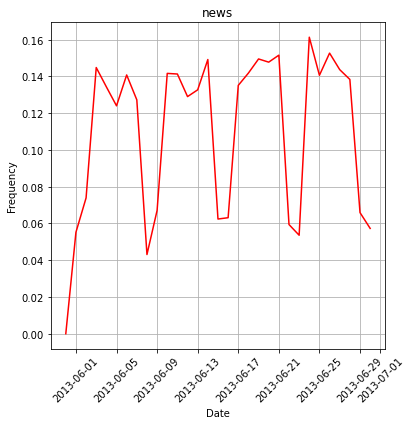

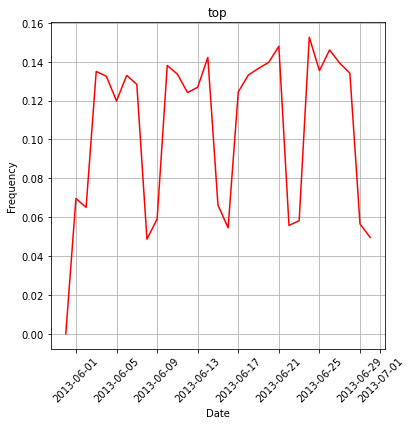

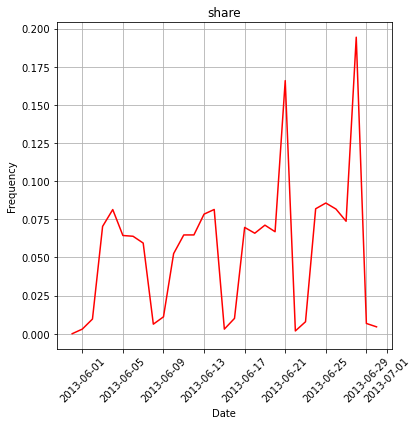

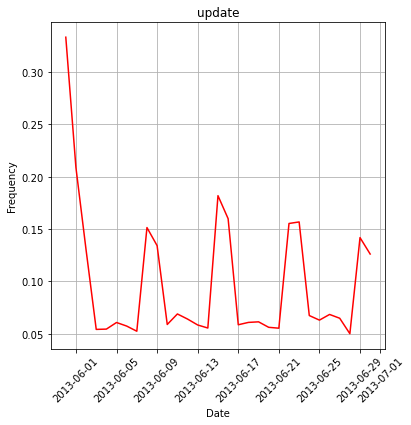

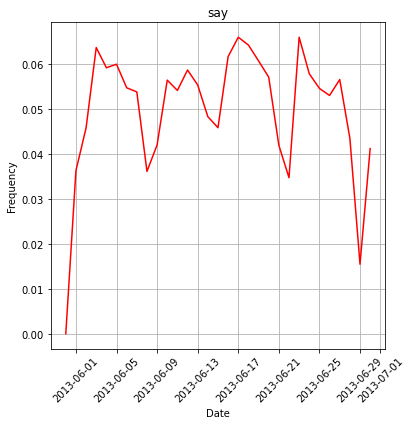

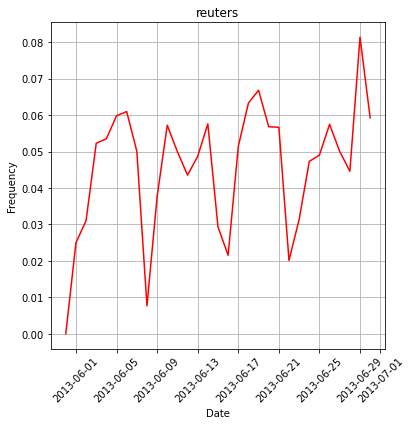

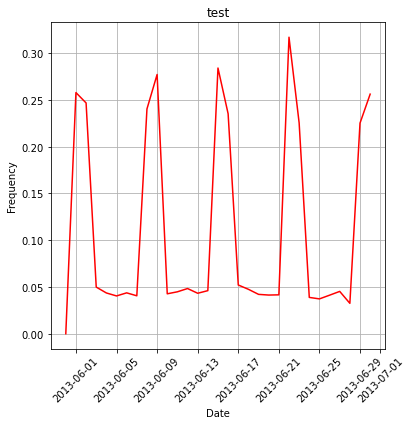

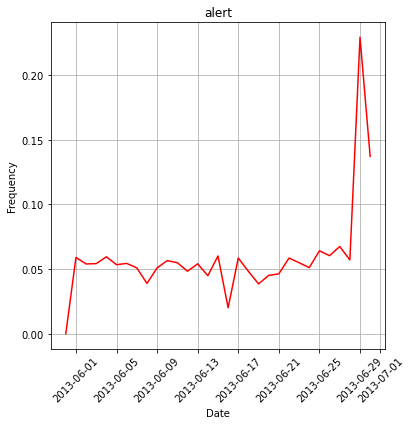

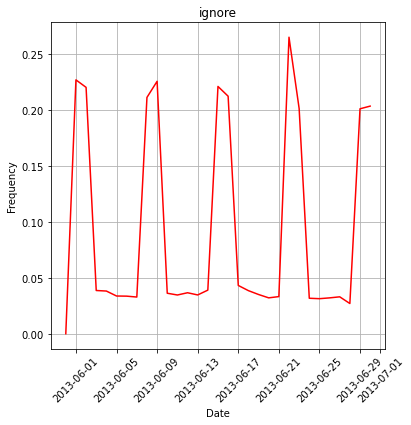

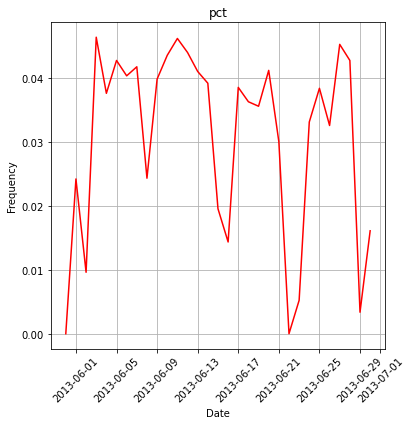

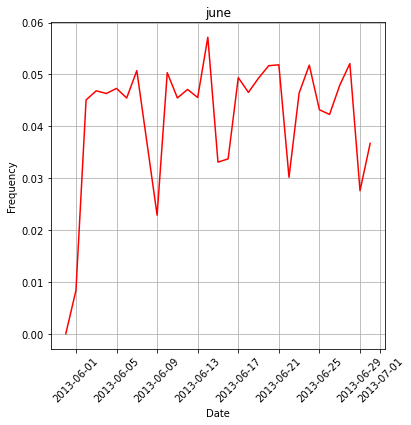

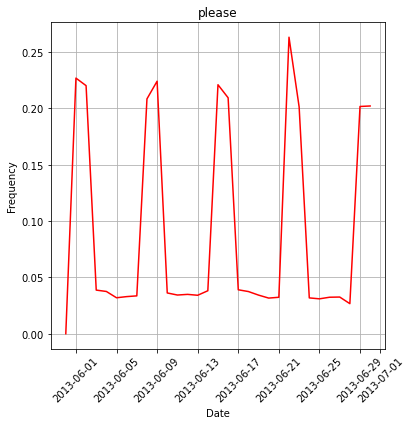

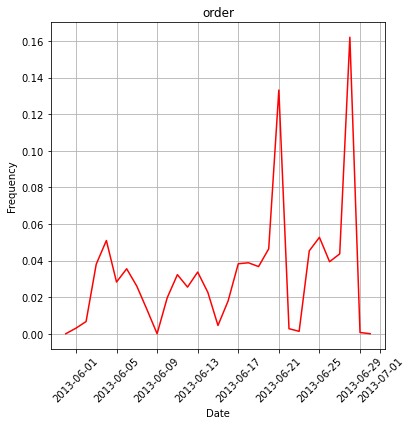

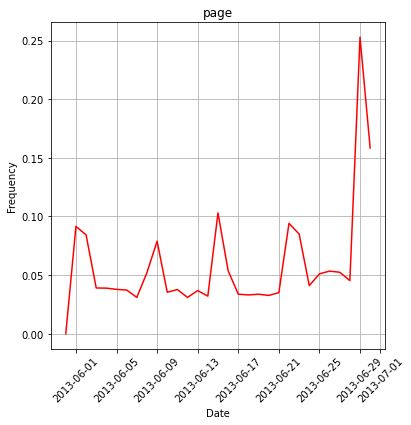

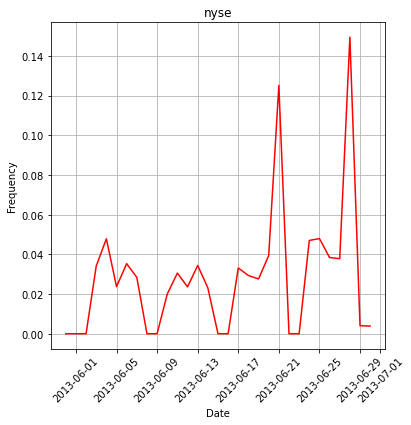

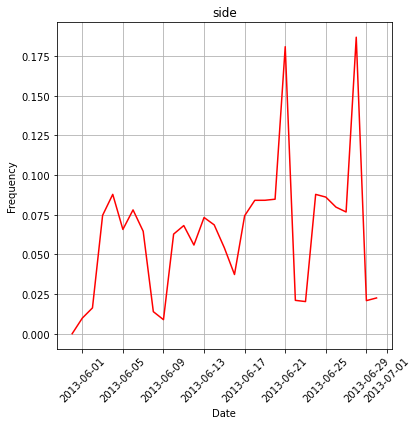

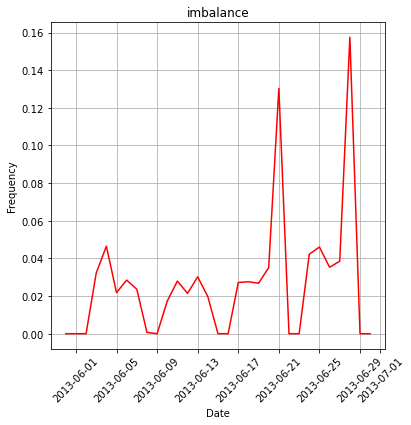

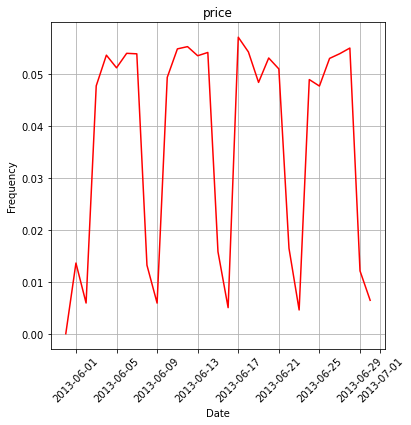

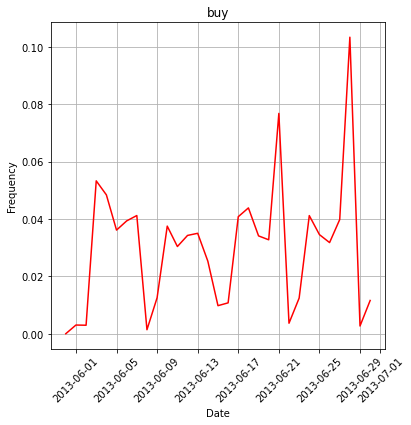

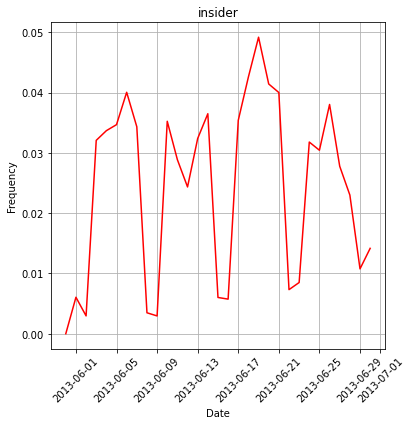

In [48]:
#Ploting Graph of all the Trending Words
for text in df_final1:
    if text != 'Text':
        mean=0
        mean = df_final1[text].resample('1 D').mean()
        plt.figure(figsize=(6,6))
        plt.title(text)
        plt.xlabel('Date'); 
        plt.ylabel('Frequency')
        plt.plot(mean.index, mean,color='red')
        plt.xticks(rotation=45)
        plt.grid(True)
     
      
plt.show()


## Generating mean frequency

In [49]:

# Average of news column by day
mean_news = df_final1['news'].resample('1 d').mean()

# Average of top column by day
mean_top = df_final1['top'].resample('1 d').mean()

# Average of share column by day
mean_share = df_final1['share'].resample('1 D').mean()

# Average of update column by day
mean_update = df_final1['update'].resample('1 D').mean()

# Average of say column by day
mean_say = df_final1['say'].resample('1 D').mean()

<function matplotlib.pyplot.show(close=None, block=None)>

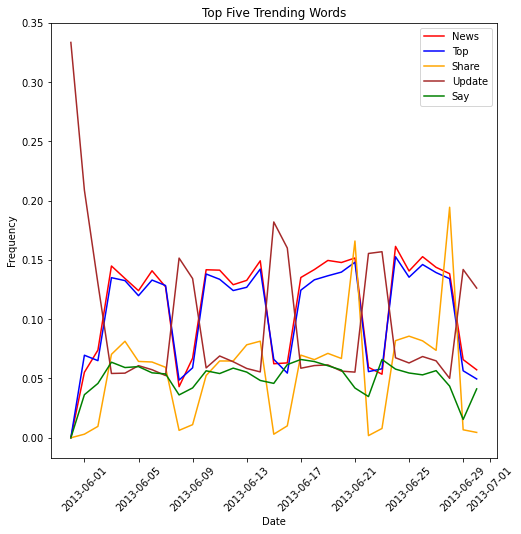

In [56]:


# Add labels and show
plt.figure(figsize=(8,8))
plt.xlabel('Date'); plt.ylabel('Frequency')
plt.title('Top Five Trending Words')


# Plot mean words by index
plt.plot(mean_news.index, mean_news, color = 'red')
plt.plot(mean_top.index, mean_top, color = 'blue')
plt.plot(mean_share.index, mean_share, color = 'orange')
plt.plot(mean_update.index, mean_update, color = 'brown')
plt.plot(mean_say.index, mean_say, color = 'green')

plt.legend(('News', 'Top','Share','Update','Say'))
plt.xticks(rotation=45)
plt.show



# Top 20 Trending Words

In [51]:
dft

,Trending_words,count
0,news,32616
1,top,29812
2,share,15912
3,update,13916
4,say,12665
5,reuters,12403
6,test,11321
7,alert,10877
8,ignore,10700
9,pct,10636
